In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import glob
import os

In [2]:
forecast_demand_file_path = '../data/forecastdemand_nsw.csv'
actual_demand_file_path = '../data/totaldemand_nsw.csv'
temperature_file_path = '../data/temperature_nsw.csv'
forecast_demand = pd.read_csv(forecast_demand_file_path)
actual_demand = pd.read_csv(actual_demand_file_path)
temperature = pd.read_csv(temperature_file_path)


In [3]:
forecast_demand.head()

,DATETIME,REGIONID,FORECASTDEMAND,PREDISPATCHSEQNO,PERIODID,LASTCHANGED
0,2010-01-01 00:00:00,NSW1,7832.04,2009123018,71,2009-12-30 12:31:49
1,2010-01-01 00:00:00,NSW1,7832.04,2009123019,70,2009-12-30 13:01:43
2,2010-01-01 00:00:00,NSW1,7832.03,2009123020,69,2009-12-30 13:31:36
3,2010-01-01 00:00:00,NSW1,7832.03,2009123021,68,2009-12-30 14:01:44
4,2010-01-01 00:00:00,NSW1,7830.96,2009123022,67,2009-12-30 14:31:35


In [4]:
actual_demand.head()
actual_demand.tail()

,DATETIME,REGIONID,TOTALDEMAND
1323393,2022-07-31 23:40:00,NSW1,8180.34
1323394,2022-07-31 23:45:00,NSW1,8237.50
1323395,2022-07-31 23:50:00,NSW1,8109.83
1323396,2022-07-31 23:55:00,NSW1,8044.52
1323397,2022-08-01 00:00:00,NSW1,8027.28


In [5]:
temperature.head()
temperature.tail()
temperature.loc[temperature['TEMPERATURE'] <= -5, 'TEMPERATURE'] = np.nan
temperature.min()

DATETIME       2010-01-01 00:00:00
LOCATION                     94766
TEMPERATURE                   -1.3
dtype: object

In [6]:
path = '../data/nswdemand2022onwards'
all_files = glob.glob(os.path.join(path, "*.csv"))

total_demand_2022onwards = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

In [7]:
total_demand_2022onwards.head()

,REGION,SETTLEMENTDATE,TOTALDEMAND,RRP,PERIODTYPE
0,NSW1,2022/01/01 00:05:00,7206.03,124.86,TRADE
1,NSW1,2022/01/01 00:10:00,7174.26,126.02,TRADE
2,NSW1,2022/01/01 00:15:00,7135.00,124.93,TRADE
3,NSW1,2022/01/01 00:20:00,7065.84,113.54,TRADE
4,NSW1,2022/01/01 00:25:00,6995.08,123.12,TRADE


In [8]:
df = pd.DataFrame({'Date Time': actual_demand['DATETIME'], 'Total Demand': actual_demand['TOTALDEMAND']})
df.head()

,Date Time,Total Demand
0,2010-01-01 00:00:00,7997.41
1,2010-01-01 00:05:00,7946.51
2,2010-01-01 00:10:00,7921.55
3,2010-01-01 00:15:00,7837.84
4,2010-01-01 00:20:00,7781.11


In [9]:
df = pd.merge(df,temperature,left_on=['Date Time'], right_on=['DATETIME'], how = 'left')
df=df.drop(columns=['DATETIME', 'LOCATION'])
df.head(15)

,Date Time,Total Demand,TEMPERATURE
0,2010-01-01 00:00:00,7997.41,23.1
1,2010-01-01 00:05:00,7946.51,NaN
2,2010-01-01 00:10:00,7921.55,NaN
3,2010-01-01 00:15:00,7837.84,NaN
4,2010-01-01 00:20:00,7781.11,NaN
5,2010-01-01 00:25:00,7685.53,NaN
6,2010-01-01 00:30:00,7683.34,22.9
7,2010-01-01 00:35:00,7624.60,NaN
8,2010-01-01 00:40:00,7606.74,NaN
9,2010-01-01 00:45:00,7555.47,NaN


In [10]:
df.dtypes

Date Time        object
Total Demand    float64
TEMPERATURE     float64
dtype: object

In [11]:
df['TEMPERATURE'] = df['TEMPERATURE'].interpolate(method='linear')

In [12]:
df.head(15)

,Date Time,Total Demand,TEMPERATURE
0,2010-01-01 00:00:00,7997.41,23.100000
1,2010-01-01 00:05:00,7946.51,23.066667
2,2010-01-01 00:10:00,7921.55,23.033333
3,2010-01-01 00:15:00,7837.84,23.000000
4,2010-01-01 00:20:00,7781.11,22.966667
5,2010-01-01 00:25:00,7685.53,22.933333
6,2010-01-01 00:30:00,7683.34,22.900000
7,2010-01-01 00:35:00,7624.60,22.850000
8,2010-01-01 00:40:00,7606.74,22.800000
9,2010-01-01 00:45:00,7555.47,22.750000


In [13]:
df['Date Time'] = pd.to_datetime(df['Date Time'])

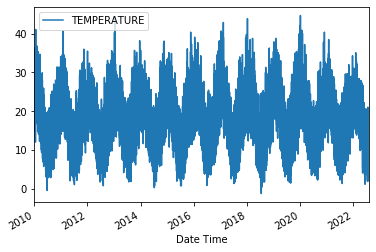

In [14]:
df.plot(x='Date Time' ,y= 'TEMPERATURE' )

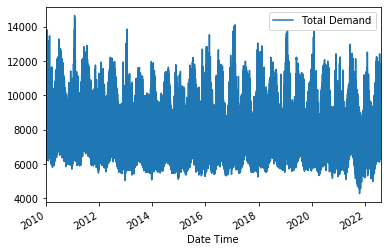

In [15]:
df.plot(x='Date Time', y = 'Total Demand')

In [16]:
forecast_demand['DATETIME'] = pd.to_datetime(forecast_demand['DATETIME'])

In [17]:
actual_demand['DATETIME'] = pd.to_datetime(actual_demand['DATETIME'])

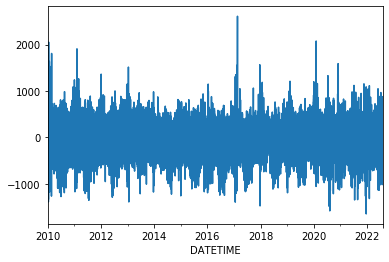

In [18]:
(forecast_demand.set_index('DATETIME').resample('1H').mean()['FORECASTDEMAND'] - actual_demand.set_index('DATETIME').resample('1H').mean()['TOTALDEMAND']).plot()

In [19]:
act_demand = actual_demand.set_index('DATETIME').resample('1H').mean()

In [20]:
act_demand['HourOfDay'] = act_demand.index.hour
act_demand['DayOfWeek'] = act_demand.index.dayofweek
act_demand['DayOfYear'] = act_demand.index.dayofyear

In [21]:
act_demand

,TOTALDEMAND,HourOfDay,DayOfWeek,DayOfYear
DATETIME,,,,
2010-01-01 00:00:00,7707.110833,0,4,1
2010-01-01 01:00:00,7014.171667,1,4,1
2010-01-01 02:00:00,6491.061667,2,4,1
2010-01-01 03:00:00,6256.344167,3,4,1
2010-01-01 04:00:00,6225.776667,4,4,1
...,...,...,...,...
2022-07-31 20:00:00,10081.598333,20,6,212
2022-07-31 21:00:00,9399.320000,21,6,212
2022-07-31 22:00:00,8769.945833,22,6,212


In [22]:
temperature['DATETIME'] = pd.to_datetime(temperature['DATETIME'])

In [23]:
temp = temperature.set_index('DATETIME').resample('1H').mean()

In [24]:
temp

,LOCATION,TEMPERATURE
DATETIME,,
2010-01-01 00:00:00,94766.0,22.95
2010-01-01 01:00:00,94766.0,22.55
2010-01-01 02:00:00,94766.0,22.45
2010-01-01 03:00:00,94766.0,22.30
2010-01-01 04:00:00,94766.0,22.15
...,...,...
2022-07-31 20:00:00,94766.0,13.90
2022-07-31 21:00:00,94766.0,14.10
2022-07-31 22:00:00,94766.0,13.60


In [25]:
lag_value = -6

# Apply the lag to the 'TOTALDEMAND' column
temp['TEMPERATURE_lagged'] = temp['TEMPERATURE'].shift(periods=lag_value)

In [26]:
temp.head(20)

,LOCATION,TEMPERATURE,TEMPERATURE_lagged
DATETIME,,,
2010-01-01 00:00:00,94766.0,22.95,22.85
2010-01-01 01:00:00,94766.0,22.55,23.55
2010-01-01 02:00:00,94766.0,22.45,24.55
2010-01-01 03:00:00,94766.0,22.30,24.95
2010-01-01 04:00:00,94766.0,22.15,24.85
2010-01-01 05:00:00,94766.0,22.25,25.50
2010-01-01 06:00:00,94766.0,22.85,27.20
2010-01-01 07:00:00,94766.0,23.55,28.35
2010-01-01 08:00:00,94766.0,24.55,28.60


In [27]:
data = act_demand.merge(temp, left_index=True, right_index=True, how='inner')

In [28]:
data = data.drop(['LOCATION','TEMPERATURE'], axis=1)

In [29]:
data = data.dropna()

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
target_column = 'TOTALDEMAND'
feature_columns = [col for col in data.columns if col != target_column]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[feature_columns], data[target_column], test_size=0.2, random_state=42)

# Create an instance of the LinearRegression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Optionally, you can inspect the model coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Mean Squared Error: 1227887.7601919665
R-squared: 0.2612422800741172
Coefficients: [  82.48693423 -124.89312747   -1.56466454  -15.36655834]
Intercept: 8043.195578398628


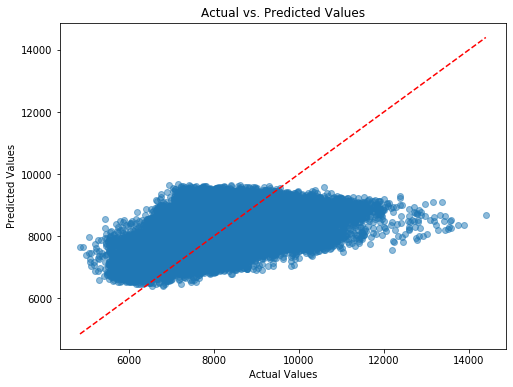

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

plt.show()

In [33]:
data

,TOTALDEMAND,HourOfDay,DayOfWeek,DayOfYear,TEMPERATURE_lagged
DATETIME,,,,,
2010-01-01 00:00:00,7707.110833,0,4,1,22.85
2010-01-01 01:00:00,7014.171667,1,4,1,23.55
2010-01-01 02:00:00,6491.061667,2,4,1,24.55
2010-01-01 03:00:00,6256.344167,3,4,1,24.95
2010-01-01 04:00:00,6225.776667,4,4,1,24.85
...,...,...,...,...,...
2022-07-31 14:00:00,8100.300000,14,6,212,13.90
2022-07-31 15:00:00,8849.903333,15,6,212,14.10
2022-07-31 16:00:00,9762.349167,16,6,212,13.60


In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [35]:
# Define target and feature columns
target_column = 'TOTALDEMAND'
feature_columns = ['HourOfDay', 'DayOfWeek', 'DayOfYear', 'TEMPERATURE_lagged']

# Set the date threshold for training data (end of November 2020)
training_end_date = '2020-03-30'

# Split the data into training and testing sets
train_data = data.loc[data.index <= training_end_date]
test_data = data.loc[data.index > training_end_date]

# Define training and testing features and target
X_train = train_data[feature_columns]
y_train = train_data[target_column]

X_test = test_data[feature_columns]
y_test = test_data[target_column]

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 908590.7448200997
R-squared: 0.42685107578798176


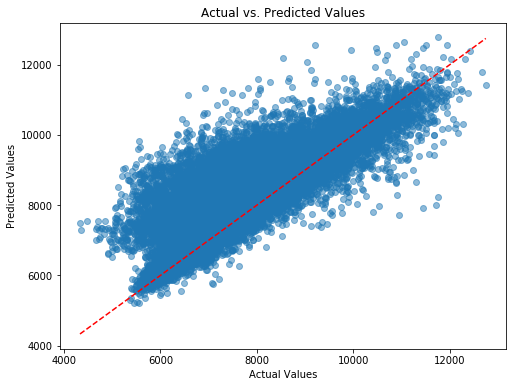

In [36]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

plt.show()

In [37]:
cpi_file_path = '../data/inflation-data.xls'
cpi = pd.read_excel(cpi_file_path)

In [38]:
cpi = cpi[['G1 CONSUMER PRICE INFLATION','Unnamed: 2']][10:]
column_rename_mapping = {
    'G1 CONSUMER PRICE INFLATION': 'DATETIME',
    'Unnamed: 2': 'CPI',
}
cpi = cpi.rename(columns=column_rename_mapping).dropna().set_index('DATETIME')

In [39]:
min_date = data.index.min()
max_date = data.index.max()

In [40]:
cpi = cpi[(cpi.index >= min_date) & (cpi.index <= max_date)]

In [41]:
date_range = pd.date_range(start=min_date, end=max_date,freq='1H')
cpi = cpi.reindex(date_range).fillna(method='ffill')

In [42]:
lag_value = -6
# Apply the lag to the 'TOTALDEMAND' column
cpi['CPI_lagged'] = cpi['CPI'].shift(periods=lag_value)

In [43]:
df = pd.concat([data, cpi], axis=1)

In [44]:
df = df.drop('CPI', axis = 1).dropna()

In [45]:
# Define target and feature columns
target_column = 'TOTALDEMAND'
feature_columns = ['HourOfDay', 'DayOfWeek', 'DayOfYear', 'TEMPERATURE_lagged','CPI_lagged']

# Set the date threshold for training data (end of November 2020)
training_end_date = '2020-03-30'

# Split the data into training and testing sets
train_data = df.loc[df.index <= training_end_date]
test_data = df.loc[df.index > training_end_date]

# Define training and testing features and target
X_train = train_data[feature_columns]
y_train = train_data[target_column]

X_test = test_data[feature_columns]
y_test = test_data[target_column]

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1149437.173020904
R-squared: 0.27454615631613677


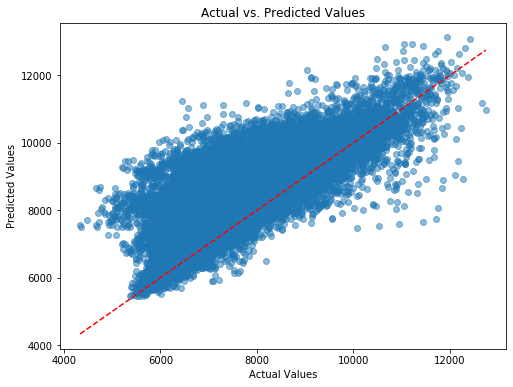

In [46]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

plt.show()